# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

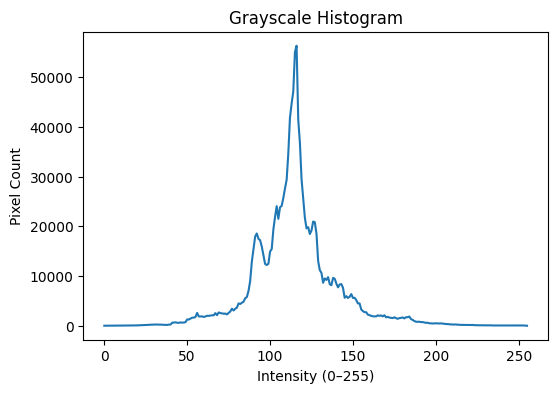

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. GRAYSCALE HISTOGRAM

def gray_histogram(gray_img):
    """
    Computes grayscale histogram using pure NumPy loops.

    Input:
        gray_img : 2D grayscale image (values 0–255)
    Output:
        hist : histogram array of length 256
    """
    hist = np.zeros(256, dtype=int)

    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            intensity = gray_img[i, j]
            hist[intensity] += 1

    return hist


# Loading image
img_bgr = cv2.imread("uk_image.jpg")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Compute histogram
gray_hist = gray_histogram(img_gray)

# Plot grayscale histogram
plt.figure(figsize=(6,4))
plt.plot(gray_hist)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.show()


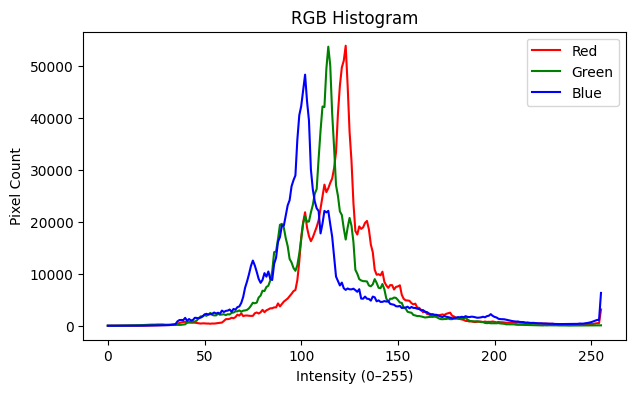

In [2]:
# 2. RGB HISTOGRAM

def rgb_histogram(rgb_img):
    """
    Computes RGB histogram using pure NumPy loops.

    Input:
        rgb_img : RGB image (values 0–255)
    Output:
        r_hist, g_hist, b_hist : histograms for R, G, B channels
    """
    r_hist = np.zeros(256, dtype=int)
    g_hist = np.zeros(256, dtype=int)
    b_hist = np.zeros(256, dtype=int)

    rows, cols, _ = rgb_img.shape
    for i in range(rows):
        for j in range(cols):
            r, g, b = rgb_img[i, j]
            r_hist[r] += 1
            g_hist[g] += 1
            b_hist[b] += 1

    return r_hist, g_hist, b_hist


# Convert BGR → RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Compute RGB histograms
r_hist, g_hist, b_hist = rgb_histogram(img_rgb)

# Plot RGB histogram
plt.figure(figsize=(7,4))
plt.plot(r_hist, color='r', label='Red')
plt.plot(g_hist, color='g', label='Green')
plt.plot(b_hist, color='b', label='Blue')
plt.title("RGB Histogram")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

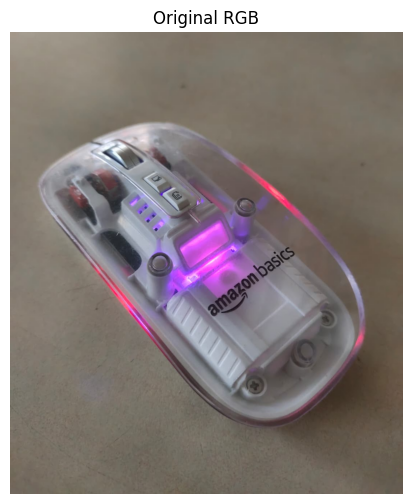

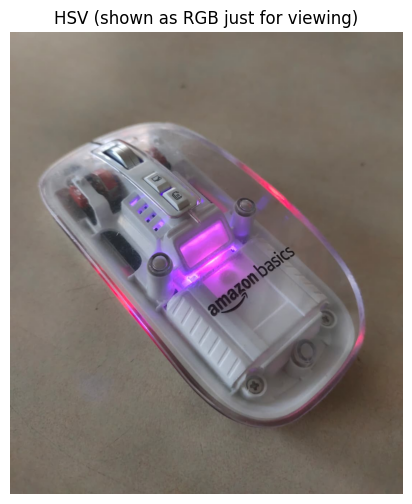

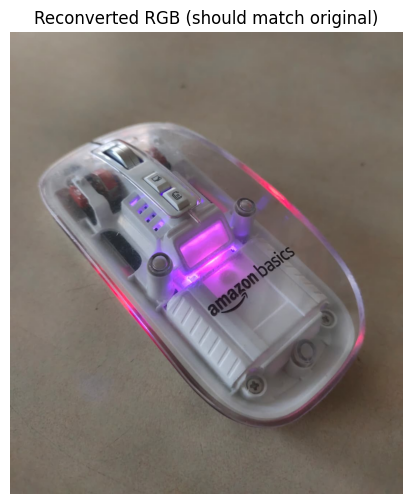

Max pixel diff: 7
Mean pixel diff: 0.21672224777675558


In [4]:
# PART B: RGB to HSV

import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(title, img, cmap=None, figsize=(6,6)):
    plt.figure(figsize=figsize)
    if img.ndim == 2:
        plt.imshow(img, cmap="gray" if cmap is None else cmap)
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


def rgb_to_hsv(rgb_img):
    """
    Convert RGB uint8 image (0..255) -> HSV uint8 (OpenCV-compatible) using only NumPy.
    """
    rgb = rgb_img.astype(np.float32) / 255.0
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]

    cmax = np.maximum(np.maximum(r, g), b)
    cmin = np.minimum(np.minimum(r, g), b)
    delta = cmax - cmin
    h = np.zeros_like(cmax, dtype=np.float32)

    mask = delta > 1e-8

    # If max is R
    idx = (cmax == r) & mask
    h[idx] = ((g[idx] - b[idx]) / delta[idx]) % 6.0

    # If max is G
    idx = (cmax == g) & mask
    h[idx] = ((b[idx] - r[idx]) / delta[idx]) + 2.0

    # If max is B
    idx = (cmax == b) & mask
    h[idx] = ((r[idx] - g[idx]) / delta[idx]) + 4.0

    h = h * 60.0
    h = (h % 360.0)

    # Saturation [0..1]
    s = np.zeros_like(cmax, dtype=np.float32)
    nonzero = cmax > 1e-8
    s[nonzero] = delta[nonzero] / cmax[nonzero]

    # Value [0..1]
    v = cmax

    # Scale to OpenCV uint8 HSV ranges:
    H = (h / 2.0)
    S = s * 255.0
    V = v * 255.0

    hsv = np.stack([H, S, V], axis=2)
    hsv_u8 = np.clip(hsv, 0, 255).astype(np.uint8)

    # OpenCV hue maximum is 179
    hsv_u8[..., 0] = np.clip(hsv_u8[..., 0], 0, 179)

    return hsv_u8


# TEST
img_bgr = cv2.imread("uk_image.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

hsv_np = rgb_to_hsv(img_rgb)

rgb_back = cv2.cvtColor(hsv_np, cv2.COLOR_HSV2RGB)

show("Original RGB", img_rgb)
show("HSV (shown as RGB just for viewing)", cv2.cvtColor(hsv_np, cv2.COLOR_HSV2RGB))
show("Reconverted RGB (should match original)", rgb_back)

# check difference
diff = np.abs(img_rgb.astype(np.int16) - rgb_back.astype(np.int16))
print("Max pixel diff:", diff.max())
print("Mean pixel diff:", diff.mean())


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

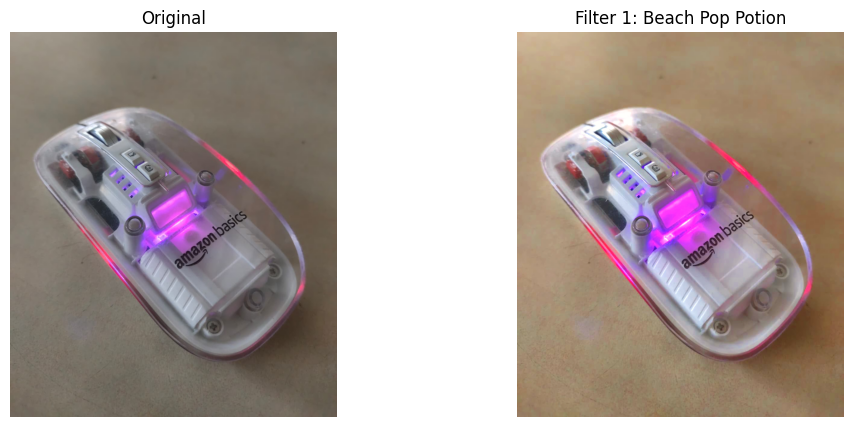

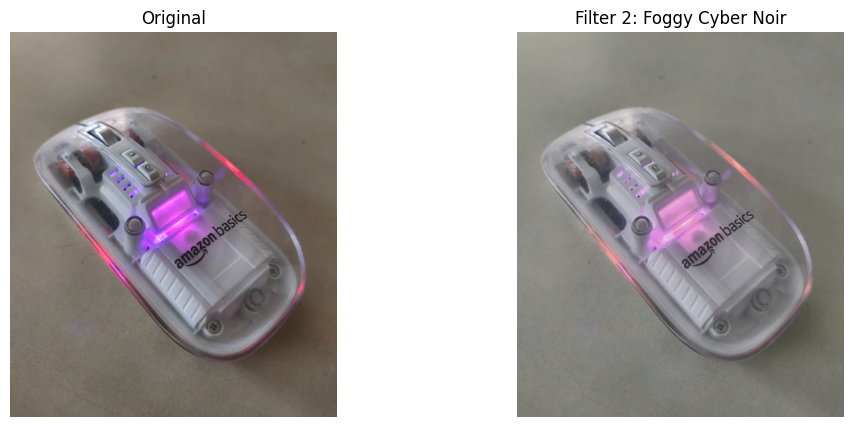

NOTE (Filter 1): I boosted contrast and used vibrance so dull colors (sky/sea) become vivid without over-saturating already bright regions. A warm tint improves skin/sand tones, so it suits beach/outdoor photos.

NOTE (Filter 2): I used gamma to lift shadows and lower contrast to create a foggy cinematic feel. Hue shift + split-toning makes shadows cooler and highlights slightly warm, which works well for night/city/rainy scenes.


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def clip_u8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

def show_side_by_side(title_left, img_left, title_right, img_right, figsize=(12,5)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(img_left)
    plt.title(title_left)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(img_right)
    plt.title(title_right)
    plt.axis("off")
    plt.show()

def rgb_to_hsv_numpy(rgb_img):
    rgb = rgb_img.astype(np.float32) / 255.0
    r, g, b = rgb[...,0], rgb[...,1], rgb[...,2]

    cmax = np.maximum(np.maximum(r, g), b)
    cmin = np.minimum(np.minimum(r, g), b)
    delta = cmax - cmin

    h = np.zeros_like(cmax)
    mask = delta != 0

    idx = (cmax == r) & mask
    h[idx] = ((g[idx] - b[idx]) / delta[idx]) % 6
    idx = (cmax == g) & mask
    h[idx] = ((b[idx] - r[idx]) / delta[idx]) + 2
    idx = (cmax == b) & mask
    h[idx] = ((r[idx] - g[idx]) / delta[idx]) + 4

    h = (h * 60) % 360

    s = np.zeros_like(cmax)
    s[cmax != 0] = delta[cmax != 0] / cmax[cmax != 0]

    v = cmax

    H = h / 2.0
    S = s * 255.0
    V = v * 255.0

    hsv = np.stack([H, S, V], axis=2)
    hsv = np.clip(hsv, 0, 255).astype(np.uint8)
    hsv[...,0] = np.clip(hsv[...,0], 0, 179)
    return hsv

# Gamma correction using LUT
def gamma_correct(rgb_img, gamma):
    inv = 1.0 / gamma
    table = np.array([(i/255.0)**inv * 255 for i in range(256)]).astype(np.uint8)
    return cv2.LUT(rgb_img, table)

# Vibrance boost
def vibrance_boost(rgb_img, strength=0.8):
    hsv = rgb_to_hsv_numpy(rgb_img).astype(np.float32)
    s = hsv[...,1] / 255.0

    s_new = s + strength * (1 - s) * s
    hsv[...,1] = np.clip(s_new * 255.0, 0, 255)

    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Split-toning: shadows get cool (blue), highlights get warm (orange)
def split_tone(rgb_img, shadow_strength=0.25, highlight_strength=0.20):
    img = rgb_img.astype(np.float32)

    lum = (0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]) / 255.0
    lum = lum[..., None]
    shadows = (1.0 - lum)

    highlights = lum

    cool = np.array([0.0, 15.0, 35.0], dtype=np.float32)

    warm = np.array([35.0, 15.0, 0.0], dtype=np.float32)

    img = img + shadow_strength * shadows * cool
    img = img + highlight_strength * highlights * warm

    return clip_u8(img)

# FILTER 1: "Beach Pop Potion"

def beach_pop_potion(rgb_img):
    """
    What this filter does:
    1) Contrast boost (alpha)  -> makes image punchy
    2) Brightness lift (beta)  -> lifts midtones
    3) Vibrance boost          -> boosts dull colors more than already-saturated areas
    4) Slight warm tint        -> makes sand/skin tones nicer
    Good for: beach, outdoor daylight, travel photos (sky/sea pop).
    """

    alpha = 1.18  # contrast
    beta  = 10    # brightness
    x = rgb_img.astype(np.float32) * alpha + beta
    x = clip_u8(x)

    # (3) Vibrance boost (selective saturation)
    x = vibrance_boost(x, strength=0.9)

    # (4) Warm tint (custom color tint)
    warm = x.astype(np.float32)
    warm[...,0] += 8   # +R
    warm[...,1] += 2   # +G
    warm[...,2] -= 3   # -B (slightly)
    return clip_u8(warm)

# FILTER 2: "Foggy Cyber Noir"

def foggy_cyber_noir(rgb_img):
    """
    What this filter does:
    1) Gamma correction (gamma>1) -> lifts shadows, gives hazy look
    2) Reduce saturation          -> moody
    3) Cool tint + Split tone     -> bluish shadows + slightly warm highlights
    4) Mild contrast reduction    -> foggy / cinematic
    Good for: night streets, rainy scenes, neon/city shots, "cinematic" mood.
    """
    # (1) Gamma for haze (gamma > 1 lifts shadows)
    x = gamma_correct(rgb_img, gamma=1.35)

    # Convert to HSV (OpenCV compatible) and reduce saturation
    hsv = rgb_to_hsv_numpy(x).astype(np.float32)

    # (2) Saturation down
    hsv[...,1] = np.clip(hsv[...,1] * 0.65, 0, 255)

    # (3) Slight hue rotation to push towards cyan/blue
    hsv[...,0] = (hsv[...,0] + 10) % 180

    hsv = hsv.astype(np.uint8)
    x = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # (4) Mild contrast reduction + small brightness drop -> foggy look
    alpha = 0.92
    beta = -5
    y = x.astype(np.float32) * alpha + beta
    y = clip_u8(y)

    # Split tone (cool shadows, warm highlights)
    y = split_tone(y, shadow_strength=0.35, highlight_strength=0.15)

    return y


img_bgr = cv2.imread("uk_image.jpg")
if img_bgr is None:
    raise ValueError("Image not found! Check filename in cv2.imread().")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# APPLY FILTERS
out1 = beach_pop_potion(img_rgb)
out2 = foggy_cyber_noir(img_rgb)

show_side_by_side("Original", img_rgb, "Filter 1: Beach Pop Potion", out1)
show_side_by_side("Original", img_rgb, "Filter 2: Foggy Cyber Noir", out2)

print("NOTE (Filter 1): I boosted contrast and used vibrance so dull colors (sky/sea) become vivid without over-saturating already bright regions. A warm tint improves skin/sand tones, so it suits beach/outdoor photos.\n")
print("NOTE (Filter 2): I used gamma to lift shadows and lower contrast to create a foggy cinematic feel. Hue shift + split-toning makes shadows cooler and highlights slightly warm, which works well for night/city/rainy scenes.")


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

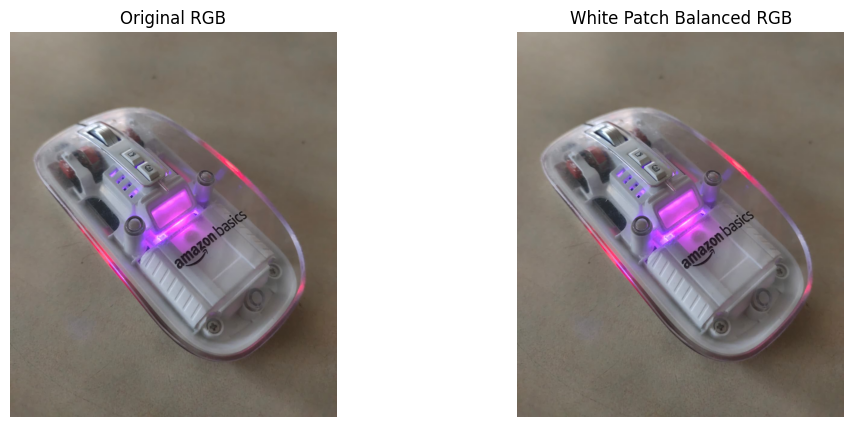

White patch max values (R,G,B): 255 255 255


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_side_by_side(title1, img1, title2, img2, figsize=(12,5)):
    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")

    plt.show()

def clip_u8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

def white_patch_balance(img_rgb):
    """
    White Patch Method:
    1) Find the brightest pixel in each channel (Rmax, Gmax, Bmax) using NumPy.
    2) Scale each channel so its max becomes 255:
         R' = R * (255 / Rmax)
         G' = G * (255 / Gmax)
         B' = B * (255 / Bmax)
    Input:  RGB uint8 image (0..255)
    Output: RGB uint8 balanced image (0..255)
    """
    img = img_rgb.astype(np.float32)

    # brightest value (white patch) per channel
    r_max = np.max(img[..., 0])
    g_max = np.max(img[..., 1])
    b_max = np.max(img[..., 2])

    # avoid divide-by-zero if any channel is all zeros
    r_scale = 255.0 / (r_max + 1e-8)
    g_scale = 255.0 / (g_max + 1e-8)
    b_scale = 255.0 / (b_max + 1e-8)

    # scale whole image by per-channel factors
    img[..., 0] *= r_scale
    img[..., 1] *= g_scale
    img[..., 2] *= b_scale

    return clip_u8(img)


img_bgr = cv2.imread("uk_image.jpg")
if img_bgr is None:
    raise ValueError("Image not found! Check filename in cv2.imread().")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

balanced = white_patch_balance(img_rgb)

show_side_by_side("Original RGB", img_rgb, "White Patch Balanced RGB", balanced)

# Print scales
print("White patch max values (R,G,B):",
      np.max(img_rgb[...,0]), np.max(img_rgb[...,1]), np.max(img_rgb[...,2]))


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

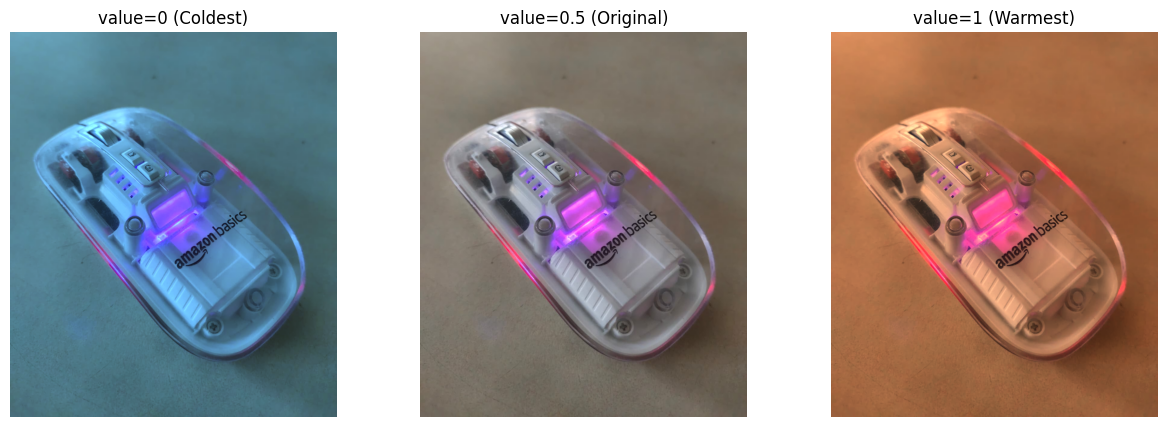

interactive(children=(FloatSlider(value=0.5, description='value', max=1.0, step=0.01), Output()), _dom_classes…

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def clip_u8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

def show_side_by_side(title1, img1, title2, img2, figsize=(12,5)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")
    plt.show()

def white_balance(img_rgb, value):
    """
    White balance "temperature" slider (simple, looks good):
    - value=0   makes image cooler (more blue/cyan)
    - value=0.5 original
    - value=1   makes image warmer (more red/yellow)

    We do:
    1) Map slider to t in [-1, +1]
    2) Apply channel gains (R up for warm, B up for cool)
    3) Slight green compensation so image doesn't look too magenta/green
    4) Preserve brightness approximately (optional normalization)
    """
    value = float(np.clip(value, 0.0, 1.0))
    t = 2.0 * (value - 0.5)   # [-1, +1]

    img = img_rgb.astype(np.float32)

    # Warm (t>0): increase R, slightly decrease B
    # Cool (t<0): increase B, slightly decrease R
    r_gain = 1.0 + 0.35 * t
    b_gain = 1.0 - 0.35 * t

    # Green compensation: tiny opposite push to reduce color cast
    g_gain = 1.0 - 0.08 * t

    out = img.copy()
    out[..., 0] *= r_gain
    out[..., 1] *= g_gain
    out[..., 2] *= b_gain

    # Keep mean intensity similar to original (prevents too dark/bright)
    orig_mean = np.mean(img)
    new_mean  = np.mean(out) + 1e-8
    out *= (orig_mean / new_mean)

    return clip_u8(out)

img_bgr = cv2.imread("uk_image.jpg")  # change to your uploaded filename
if img_bgr is None:
    raise ValueError("Image not found! Check filename in cv2.imread().")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# SHOW 3 STATES (0, 0.5, 1)
cold = white_balance(img_rgb, 0.0)
mid  = white_balance(img_rgb, 0.5)
warm = white_balance(img_rgb, 1.0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(cold); plt.title("value=0 (Coldest)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mid);  plt.title("value=0.5 (Original)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(warm); plt.title("value=1 (Warmest)"); plt.axis("off")
plt.show()

try:
    from ipywidgets import interact, FloatSlider

    @interact(value=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5))
    def wb_slider(value=0.5):
        out = white_balance(img_rgb, value)
        show_side_by_side("Original", img_rgb, f"White Balance value={value:.2f}", out)

except Exception as e:
    print("ipywidgets not available here (still OK). Error:", e)
